We begin by importing key packages and downloading the dataset:

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/comma-survey/comma-survey.csv")

In [76]:
substantive_rename_dict = {
    'In your opinion, which sentence is more gramatically correct?': 'preference',
    'Prior to reading about it above, had you heard of the serial (or Oxford) comma?': 'prior',
    'How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?': 'comma_care',
    'How would you write the following sentence?': 'sentence_example',
    'When faced with using the word "data", have you ever spent time considering if the word was a singular or plural noun?': 'data',
    'How much, if at all, do you care about the debate over the use of the word "data" as a singluar or plural noun?': 'data_care',
    'In your opinion, how important or unimportant is proper use of grammar?': 'grammar_importance',
}

demographic_rename_dict = {
    'Household Income': 'Income',
    'Location (Census Region)': 'Region'
}

df = df.rename(columns = substantive_rename_dict)
df = df.rename(columns = demographic_rename_dict)

In [77]:
print(df.isna().sum())

RespondentID            0
preference              0
prior                  30
comma_care             30
sentence_example       36
data                   38
data_care              38
grammar_importance     70
Gender                 92
Age                    92
Income                293
Education             103
Region                102
dtype: int64


In [32]:
demographics = ['Gender', 'Age', 'Income', 'Education', 'Region']

for attribute in demographics:
    proportions = df[attribute].value_counts(normalize=True).round(4)
    print(f"\n--- Distribution for {attribute} ---")
    
    for label, percent in proportions.items():
        print(f"{label}: {percent}%")


--- Distribution for Gender ---
Female: 0.5284%
Male: 0.4716%

--- Distribution for Age ---
45-60: 0.2797%
> 60: 0.2623%
30-44: 0.2449%
18-29: 0.2131%

--- Distribution for Income ---
$50,000 - $99,999: 0.3469%
$100,000 - $149,999: 0.1962%
$25,000 - $49,999: 0.189%
$0 - $24,999: 0.1447%
$150,000+: 0.1232%

--- Distribution for Education ---
Bachelor degree: 0.3353%
Some college or Associate degree: 0.2875%
Graduate degree: 0.269%
High school degree: 0.0975%
Less than high school degree: 0.0107%

--- Distribution for Region ---
Pacific: 0.1753%
East North Central: 0.1655%
South Atlantic: 0.1597%
Middle Atlantic: 0.1363%
West South Central: 0.0857%
Mountain: 0.0847%
West North Central: 0.0798%
New England: 0.0711%
East South Central: 0.0419%


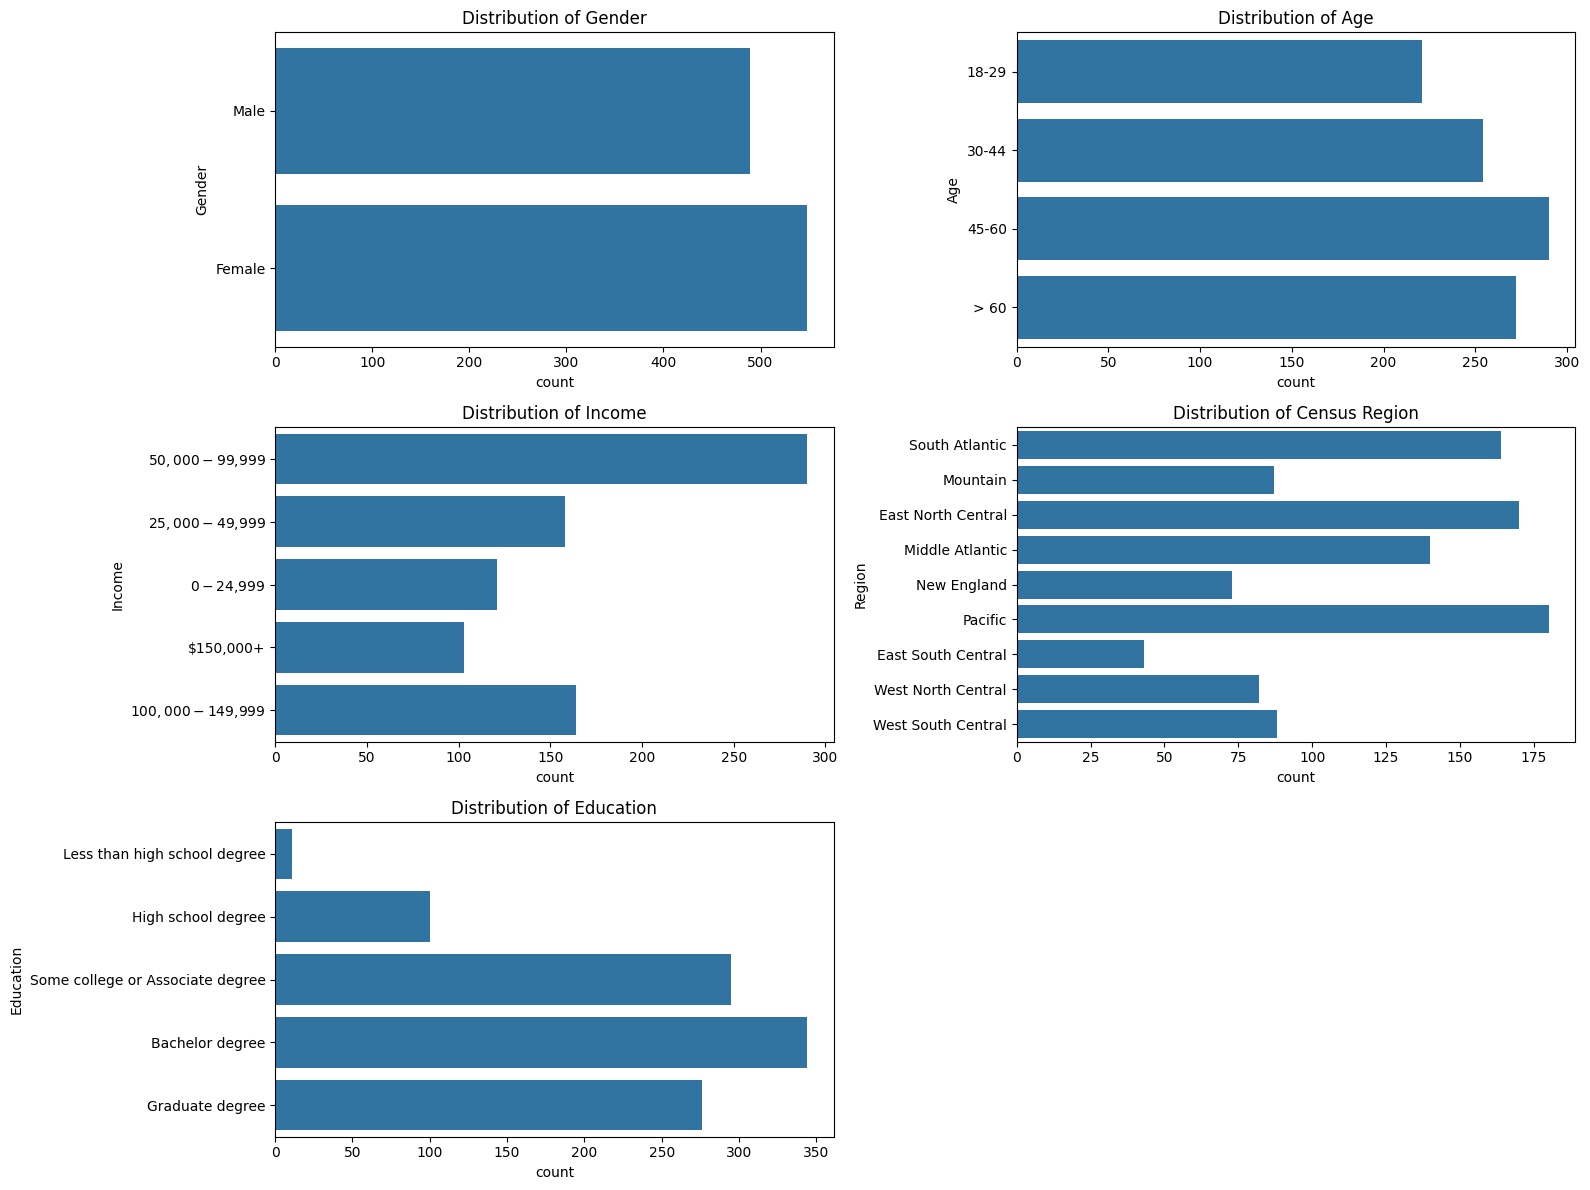

In [78]:
fig, axes = plt.subplots(3, 2, figsize = (16,12))

# Gender Distribution
sns.countplot(data = df, y = 'Gender', ax = axes[0,0])
axes[0,0].set_title('Distribution of Gender')

# Age Distribution
sns.countplot(data = df, y = 'Age', ax = axes[0,1], order = 
    ["18-29",
    "30-44",
    "45-60",
    "> 60"])
axes[0,1].set_title('Distribution of Age')

# Income Distribution
sns.countplot(data = df, y = 'Income', ax = axes[1,0])
axes[1,0].set_title('Distribution of Income')

# Region Distribution
sns.countplot(data = df, y = 'Region', ax = axes[1,1])
axes[1,1].set_title('Distribution of Census Region')

# Education Distribution
sns.countplot(data = df, y = 'Education', ax = axes[2,0], order =
    ["Less than high school degree", 
    "High school degree", 
    "Some college or Associate degree", 
    "Bachelor degree", 
    "Graduate degree"
    ])
axes[2,0].set_title('Distribution of Education')

axes[2,1].axis('off')
plt.tight_layout()
plt.show()

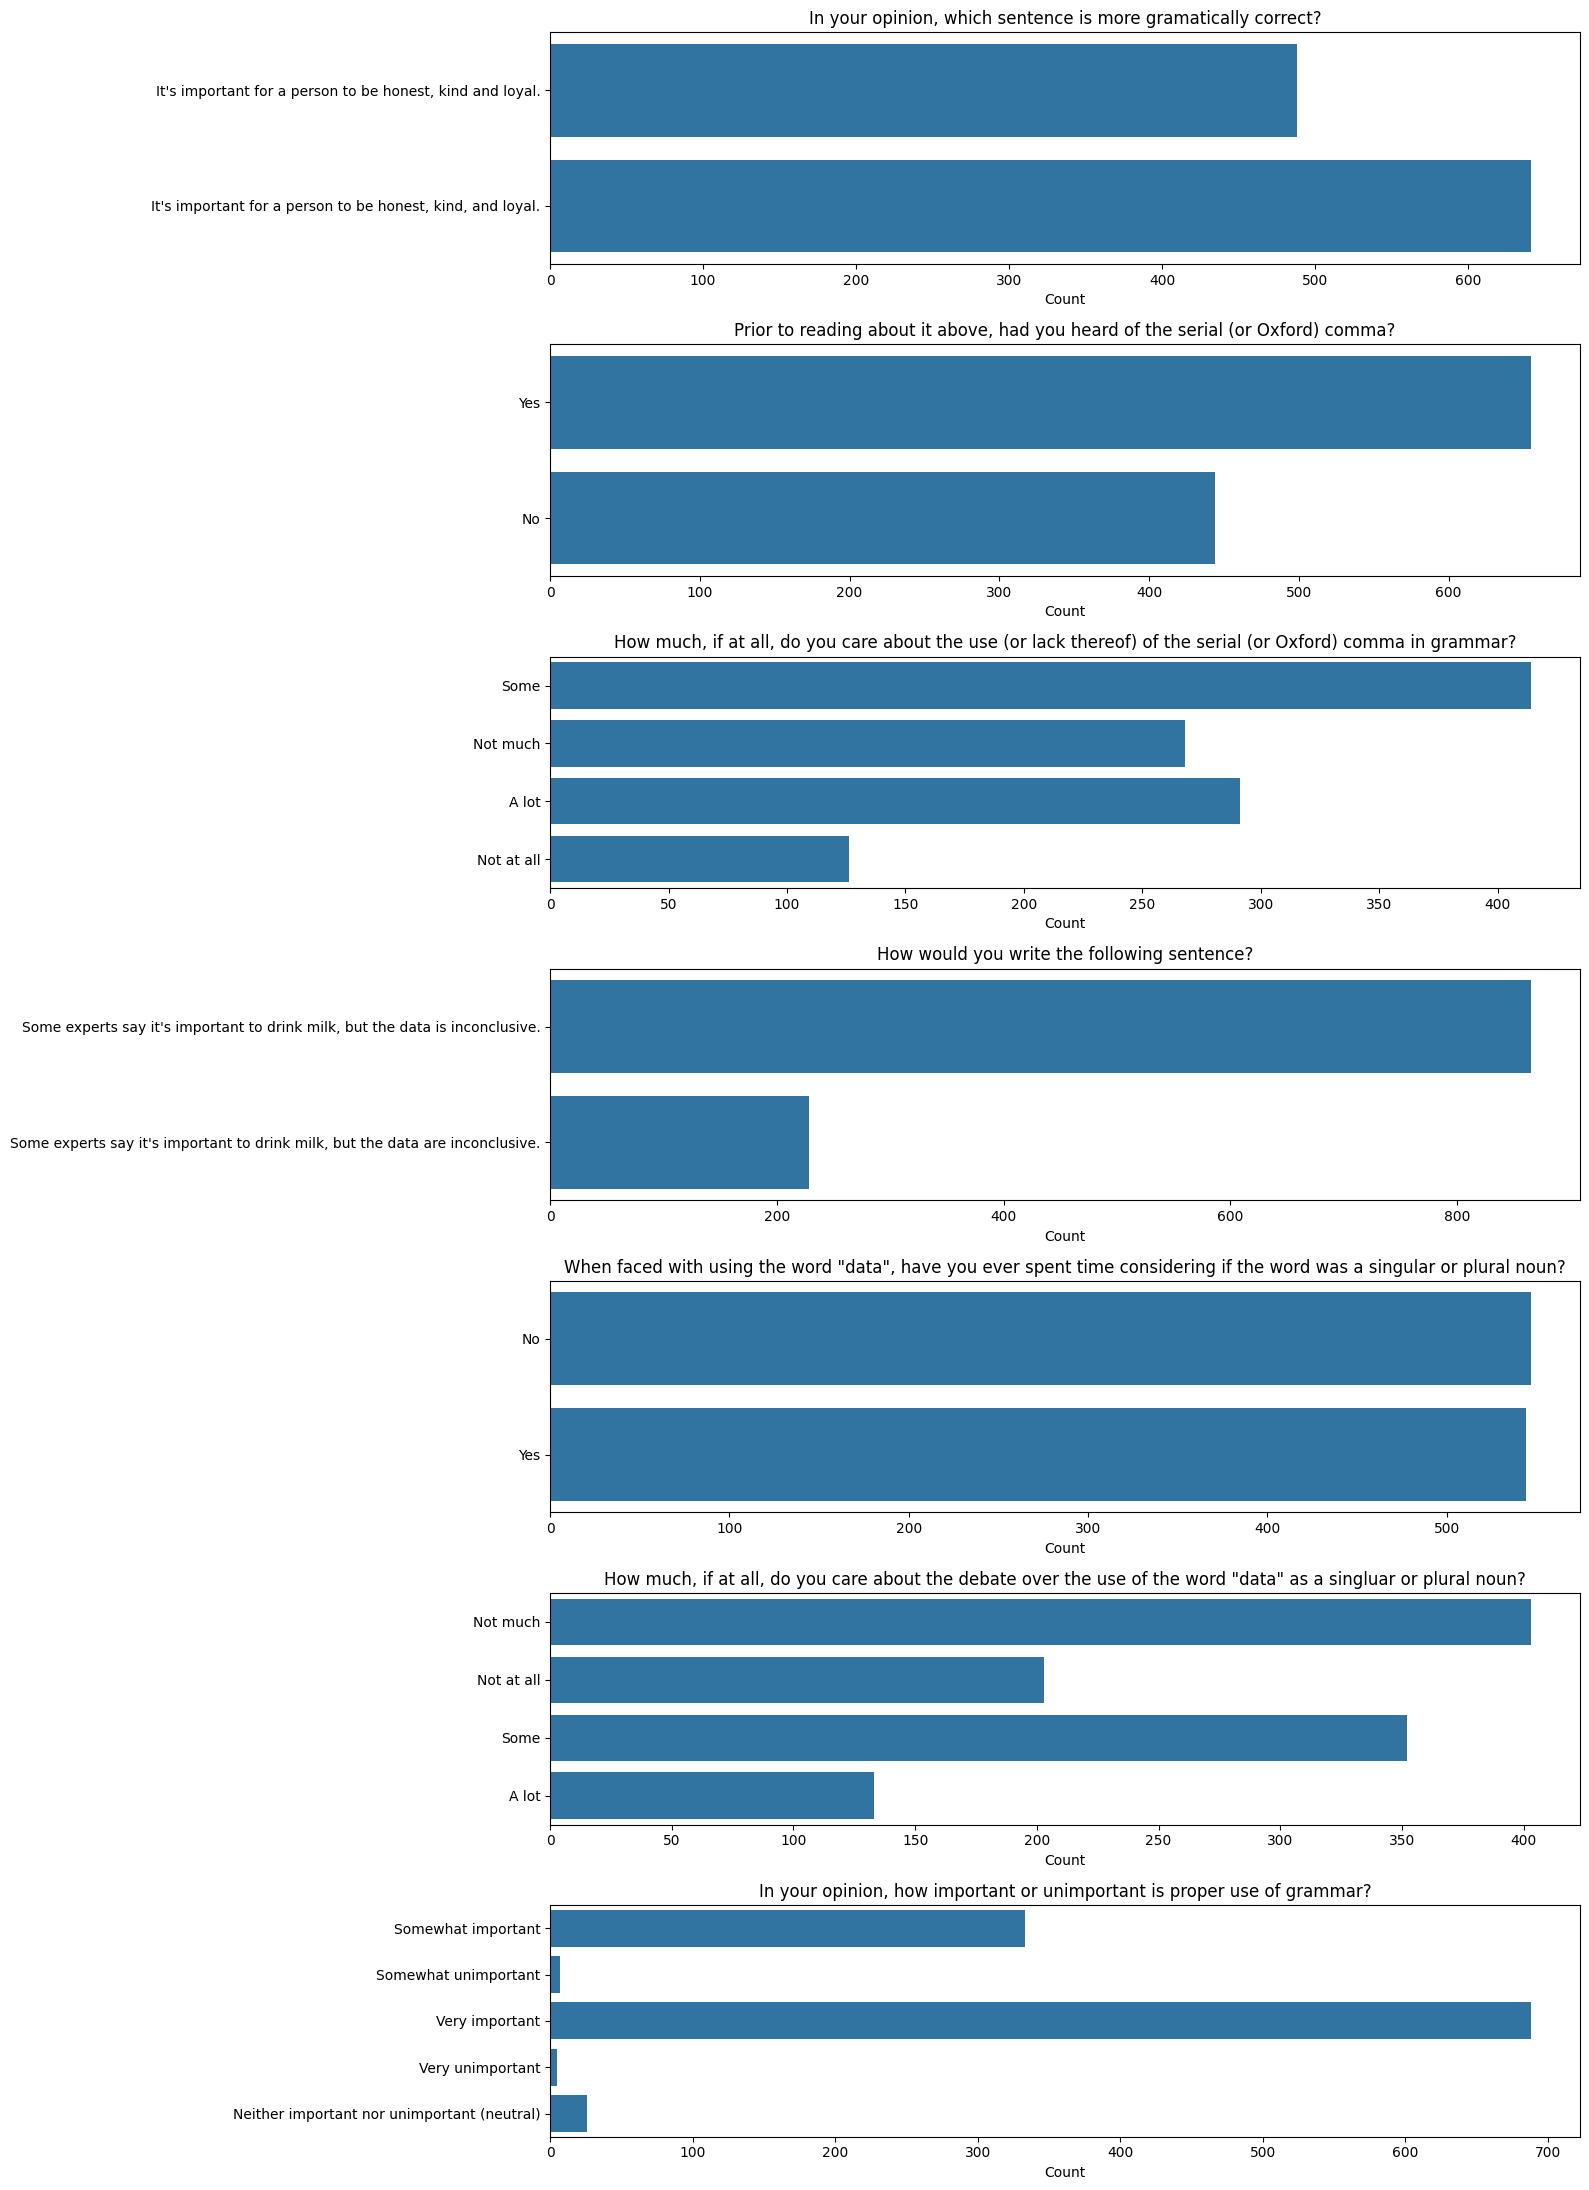

In [82]:
fig, axes = plt.subplots(7, 1, figsize = (16,22))
axes = axes.flatten()

for i, (q,k) in enumerate(substantive_rename_dict.items()):
    sns.countplot(data = df, y = k, ax=axes[i])
    axes[i].set_title(f"{q}")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("")

plt.tight_layout()